In [3]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np

class customMNISTdataset (Dataset):
    # In csv_file: img_label is the first column
    # img_dir in mnist: path of csv file --> join of img_dir & img_labels: row of image == 1 image's path

    def __init__ (self, csv_file, transform = None):
        self.img_labels  = pd.read_csv(csv_file).to_numpy()
        #self.img_dir = img_dir
        self.transform = transform


    def __len__ (self):
        return len(self.img_labels)

    def __getitem__ (self, index):
    #    img_path = os.path.join(self.img_dir, self.img_labels.iloc[index,0])
        image = self.img_labels[index,1:]
        label = int(self.img_labels[index, 0])
        image = np.reshape(image, (28,28))

        if self.transform:
            image = self.transform(image)

        return (image, label)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

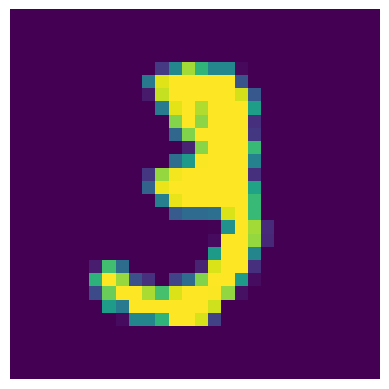

In [5]:
# Example usage
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

csv_file = 'mnist\mnist_train.csv'
dataset = customMNISTdataset(csv_file) # --> load sample to check
dataloader = DataLoader(dataset, batch_size=2, shuffle=False) #divide dataset by batch

image,label = dataset[10]
print (image)
print (label)

plt.imshow(image)
plt.axis('off')
plt.show()